In [64]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

import seaborn as sns



In [65]:
    
# import dataset
my_frame = pd.read_csv('titanic.csv',sep=';')

#my_frame.columns
my_frame.columns= my_frame.columns.str.replace(' ', '_')

#my_frame.values
#my_frame.shape

#my_frame.describe()
#my_frame.duplicated()


# recherche de données manquants

#my_frame.isnull().sum()
    
    
# remplacer les données manquants

my_frame['Cabin'].mode()
my_frame['Cabin'].fillna('C27', inplace=True)

my_frame['Embarked'].mode()
my_frame['Embarked'].fillna('S', inplace=True)

my_frame['Age'].fillna(my_frame['Age'].mean(), inplace=True)

# Encodage
encoder = LabelEncoder()

my_frame['Survived'] = encoder.fit_transform(my_frame['Survived'])

my_frame['Sex'] = encoder.fit_transform(my_frame['Sex'])

# Verification finale
my_frame.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [66]:
my_frame.describe()
my_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [67]:
my_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,C27,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,C27,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,C27,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [68]:
# selection de fonctionnalites
#  Features :Pclass, Sex, Age,Parch 
#target : Survived



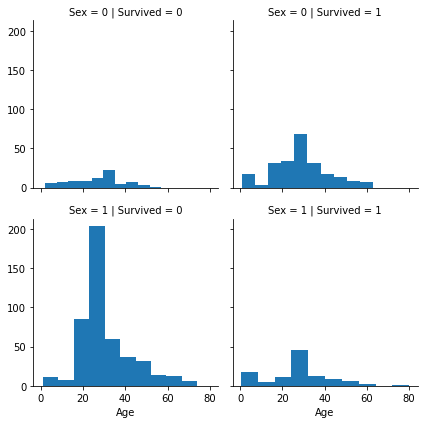

In [69]:
# correlation entre age et sexe

coll=sns.FacetGrid(data=my_frame, row="Sex", col="Survived")
coll.map(plt.hist,"Age",bins=10)

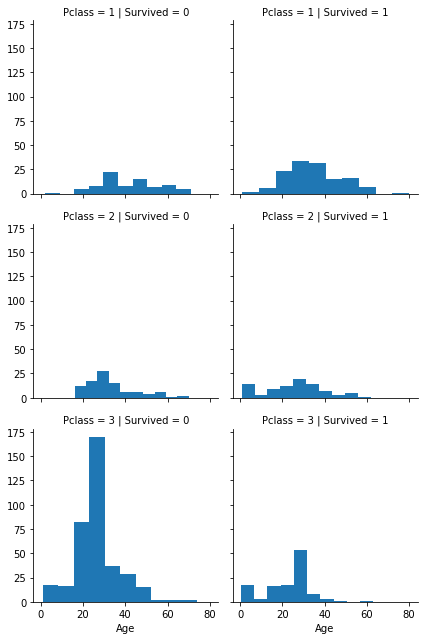

In [70]:
# correlation entre pclass et age
coll=sns.FacetGrid(data=my_frame, row="Pclass", col="Survived")
coll.map(plt.hist,"Age",bins=10)

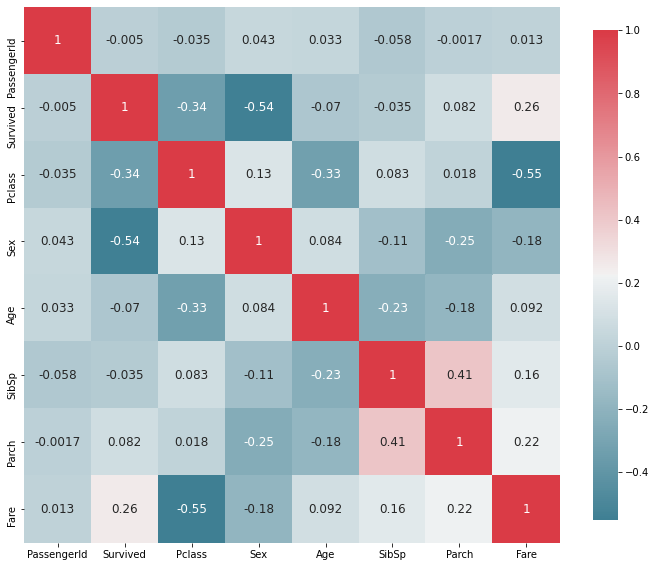

In [71]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )   
plot_correlation_map(my_frame)  

In [72]:

#data["Survived"]=data["Survived"].map({"yes": 1, "no": 0}) no need ,"survived"'s values have already transform into numerical value
x = my_frame[['Pclass', 'Sex', 'Age','Parch' ]]
y = my_frame['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

reglogic = LogisticRegression()  
reglogic.fit(x_train, y_train)  
y_pred  = reglogic.predict(x_test)    
print("Accuracy={:.2f}".format(reglogic.score(x_test, y_test)))



Accuracy=0.83


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

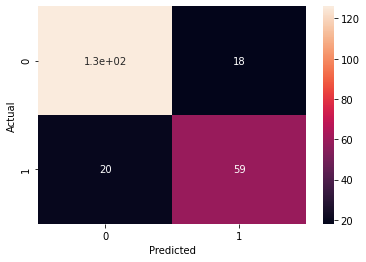

In [73]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [74]:
# rapport de classement:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87       144
           1       0.77      0.75      0.76        79

    accuracy                           0.83       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



matrice de validation pour la classification est ROC / AUC

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model
at all classification thresholds. This curve plots two parameters:
True Positive Rate
False Positive Rate

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath
the entire ROC curve (think integral calculus) from (0,0) to (1,1).
AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0;
one whose predictions are 100% correct has an AUC of 1.0.

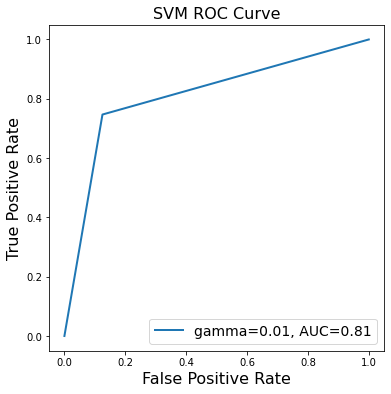

In [92]:
# construire la courbe ROC
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

